In [1]:
import tensorflow as tf

!tensorboard --logdir=/temp/test

In [2]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)

In [3]:
print (node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


In [4]:
sess = tf.Session()

In [5]:
print (sess.run([node1, node2]))

[3.0, 4.0]


In [6]:
node3 = tf.add(node1, node2)

In [7]:
print ("node3: ", node3)

node3:  Tensor("Add:0", shape=(), dtype=float32)


In [8]:
print (sess.run(node3))

7.0


In [9]:
print ("sess.run(node3): ", sess.run(node3))

sess.run(node3):  7.0


In [10]:
print ("sess.run(node3): ", sess.run(tf.add(node1, node2)))

sess.run(node3):  7.0


In [11]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

In [12]:
print ("sess.run(adder_node): ", sess.run(adder_node, {a:3, b:4.5}))

sess.run(adder_node):  7.5


In [13]:
print ("sess.run(adder_node): ", sess.run(adder_node, {a:[1, 3], b:[2, 4]}))

sess.run(adder_node):  [ 3.  7.]


In [14]:
add_and_triple = adder_node * 3

In [15]:
print ("sess.run(add_and_triple): ", sess.run(add_and_triple, {a:3, b:4.5}))

sess.run(add_and_triple):  22.5


In [45]:
W = tf.Variable([0.3], tf.float32)
b = tf.Variable([-0.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

In [46]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print (init)

name: "init_13"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
input: "^Variable_3/Assign"
input: "^Variable_4/Assign"
input: "^Variable_5/Assign"
input: "^Variable_6/Assign"
input: "^Variable_7/Assign"
input: "^Variable_8/Assign"
input: "^Variable_9/Assign"
input: "^Variable_10/Assign"
input: "^Variable_11/Assign"



In [49]:
print (sess.run(linear_model, {x:[1, 2, 3, 4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


In [43]:
# #sess = tf.Session()
# output = sess.run(linear_model, {x:[1, 2, 3, 4]})
# writer = tf.summary.FileWriter('temp/test', sess.graph) # tf.train.SummaryWriter is deprecated, instead use tf.summary.FileWriter
# writer.close()
# sess.close()

In [51]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1, 2, 3, 4], y:[0, -1, -2, -3]}))

23.66


In [52]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
print (sess.run([fixW, fixb]))
print (sess.run([W, b]))


[array([-1.], dtype=float32), array([ 1.], dtype=float32)]
[array([-1.], dtype=float32), array([ 1.], dtype=float32)]


In [53]:
print (sess.run(loss, {x:[1, 2, 3, 4], y:[0, -1, -2, -3]}))

0.0


In [54]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [65]:
#sess.run(init) #reset values to incorrect defaults

In [89]:
sess.run(init) #reset values to incorrect defaults
sess.run(train, {x:[1, 2, 3, 4], y:[0, -1, -2, -3]}) # this is for one step optimization
print (sess.run([W, b]))

[array([-0.60225427], dtype=float32), array([-0.16942096], dtype=float32)]


In [90]:
sess.run(init) #reset values to incorrect defaults
for i in range(1000):
    sess.run(train, {x:[1, 2, 3, 4], y:[0, -1, -2, -3]})
print (sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


In [93]:
#http://bcomposes.com/2015/11/26/simple-end-to-end-tensorflow-examples/
#https://github.com/aymericdamien/TensorFlow-Examples
#https://www.tensorflow.org/tutorials/image_recognition

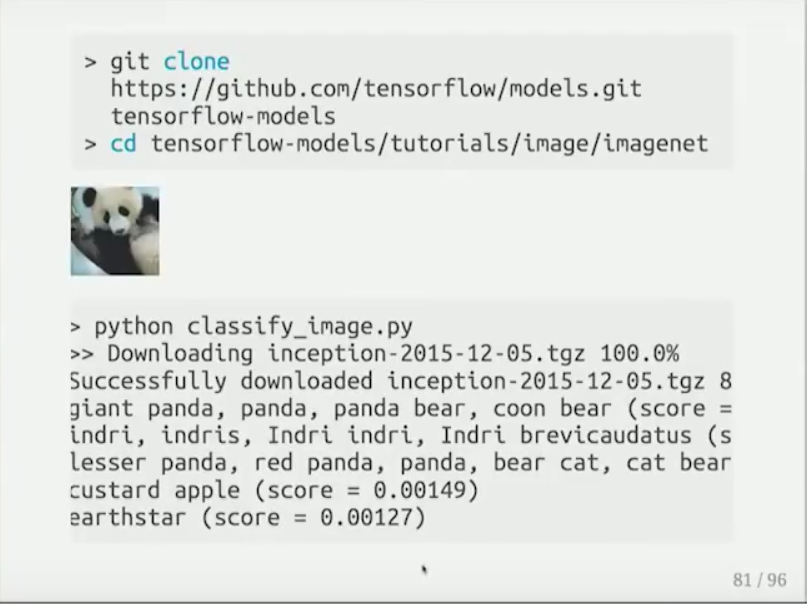